In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data1 = pd.read_csv("train.csv")

In [3]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data1.dropna(subset=['Age','Embarked'],inplace=True)

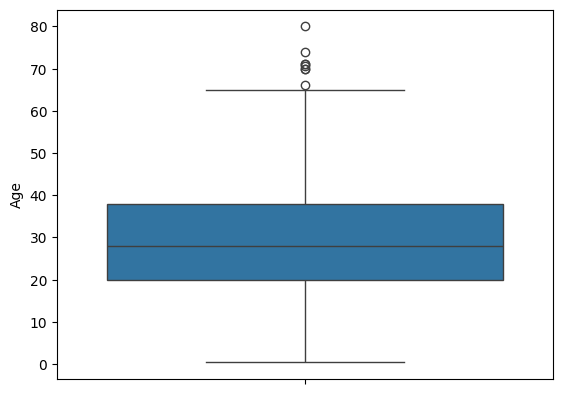

In [7]:
sns.boxplot(data1.Age)
plt.show()

In [8]:
data1.Age.isnull().sum()
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
Q1 = np.percentile(data1['Age'],25)
Q3= np.percentile(data1.Age,75)
iqr = Q3-Q1
iqr

18.0

In [10]:
Q1

20.0

In [11]:
Q3

38.0

In [12]:
higherfence=Q3 +  1.5*iqr

In [13]:
def outliar_removal(values):
    for i in values:
        if(i>=higherfence):
            data1.drop(data1[data1['Age']==i].index,inplace= True)

In [14]:
outliar_removal(data1['Age'])

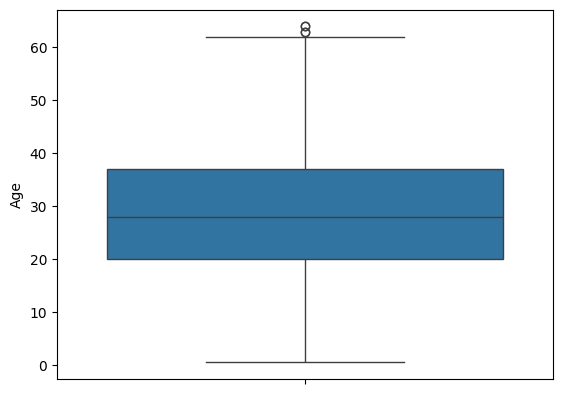

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
sns.boxplot(data1.Age)
plt.show()
data1

Text(0.5, 1.0, '1 means survived \n     0 means not survived')

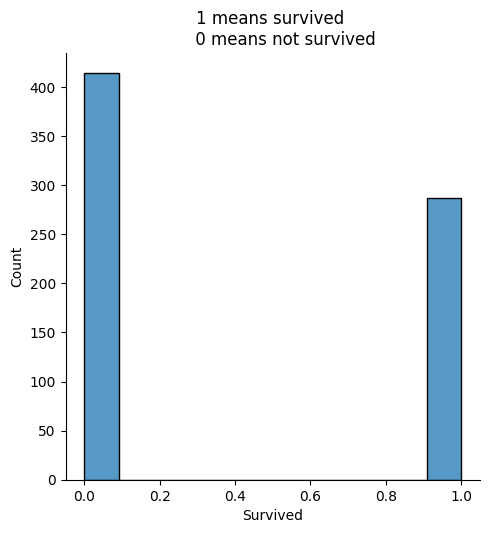

In [16]:
sns.displot(data1.Survived)
plt.title('1 means survived \n     0 means not survived')


[]

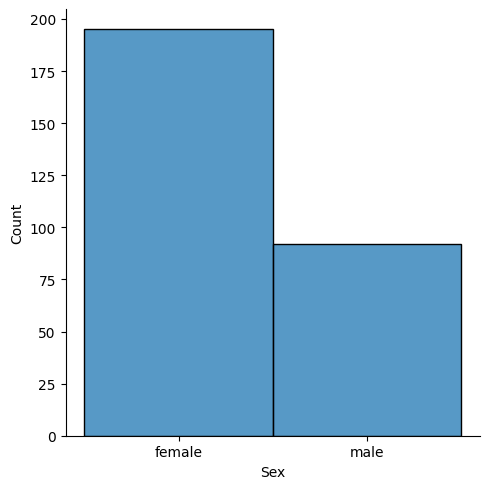

In [17]:
data2 = data1[data1.Survived==1]
sns.displot(data2.Sex)
plt.plot()

In [18]:
data1.drop(['Cabin','Fare'],axis=1,inplace=True)

In [19]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C


In [20]:
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
encoder1=LabelEncoder()
data1['Sex']= encoder1.fit_transform(data1.Sex)
data1['Ticket']=encoder1.fit_transform(data1.Ticket)
data1['Embarked']=encoder1.fit_transform(data1.Embarked)
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,401,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,462,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,521,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,38,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,366,2
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,370,1
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,80,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,12,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x=data1.drop(['Survived','Name','PassengerId','Ticket'],axis=1)
y=data1.Survived

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20)

In [26]:
xtest

,Pclass,Sex,Age,SibSp,Parch,Embarked
506,2,0,33.0,0,2,2
682,3,1,20.0,0,0,2
694,1,1,60.0,0,0,2
606,3,1,30.0,0,0,2
802,1,1,11.0,1,2,2
...,...,...,...,...,...,...
312,2,0,26.0,1,1,2
136,1,0,19.0,0,2,2
482,3,1,50.0,0,0,2
540,1,0,36.0,0,2,2


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model= LogisticRegression(max_iter=300)

In [29]:
model.fit(xtrain,ytrain)

LogisticRegression(max_iter=300)

In [30]:
model.score(xtest,ytest)

0.7588652482269503

In [31]:
pred = model.predict(xtest)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [33]:
confusion_matrix(ytest,pred)

array([[69, 12],
       [22, 38]], dtype=int64)

In [34]:
# pclass = int(input("Enter pclass : "))
# print("for male 1 for women enter 0")
# sex  = int(input("Enter sex : " ))
# age  = int(input("enter age : "))
# sibsp = int(input("enter sibsp : "))
# parch = int(input(''))

In [35]:
pred1 = model.predict([[3,0,9,1,1,0]])

C:\Users\win 10\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
def sur_nonsur(pred):
    if pred==1:
        print("survived")
    else:
        print("not survided")

In [37]:
sur_nonsur(pred1)

survived
